In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv('titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [8]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [9]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [11]:
df.describe()

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


In [12]:
df.dropna(inplace=True)

In [13]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,0,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [14]:
x = df.iloc[:,1:]

In [15]:
x

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [16]:
y = df.iloc[:,0]

In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
x_train

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000
...,...,...
92,46.0,61.1750
134,25.0,13.0000
337,41.0,134.5000
548,33.0,20.5250


In [20]:
x_test

,Age,Fare
149,42.0,13.0000
407,3.0,18.7500
53,29.0,26.0000
369,24.0,69.3000
818,43.0,6.4500
...,...,...
819,10.0,27.9000
164,1.0,39.6875
363,35.0,7.0500
56,21.0,10.5000


In [21]:
y_test

149    0
407    1
53     1
369    1
818    0
      ..
819    0
164    0
363    0
56     1
136    1
Name: Survived, Length: 143, dtype: int64

In [22]:
y_train

328    1
73     0
253    0
719    0
666    0
      ..
92     0
134    0
337    1
548    0
130    0
Name: Survived, Length: 571, dtype: int64

In [23]:
model = DecisionTreeClassifier()

In [24]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
predict = model.predict(x_test)

In [28]:
accuracy_score(y_test, predict)

0.6293706293706294

In [32]:
np.mean(cross_val_score(DecisionTreeClassifier(), x,y, cv=20, scoring='accuracy'))

0.6371031746031746

In [33]:
from sklearn.preprocessing import KBinsDiscretizer

In [81]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [82]:
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [83]:
trf = ColumnTransformer([
    ('first', kbin_age,[0]),
    ('second', kbin_fare,[1])
])

In [84]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [86]:
trf.named_transformers_['first'].n_bins_

array([10])

In [87]:
trf.named_transformers_['second'].n_bins_

array([10])

In [88]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [89]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [90]:
output = pd.DataFrame({
    'age': x_train['Age'],
    'age_trf': x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf': x_train_trf[:,1]
})

In [91]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [92]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,5.0,20.5250,5.0,"(28.5, 32.0]","(15.75, 26.0]"
73,26.0,4.0,14.4542,4.0,"(25.0, 28.5]","(13.0, 15.75]"
253,30.0,5.0,16.1000,5.0,"(28.5, 32.0]","(15.75, 26.0]"
719,33.0,6.0,7.7750,1.0,"(32.0, 36.0]","(7.75, 7.896]"
666,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
...,...,...,...,...,...,...
92,46.0,8.0,61.1750,8.0,"(42.0, 50.0]","(51.479, 82.171]"
134,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
337,41.0,7.0,134.5000,9.0,"(36.0, 42.0]","(82.171, 512.329]"
548,33.0,6.0,20.5250,5.0,"(32.0, 36.0]","(15.75, 26.0]"


In [97]:
model2 = DecisionTreeClassifier()

In [98]:
model2.fit(x_train_trf, y_train)

DecisionTreeClassifier()

In [99]:
prediction2 = model2.predict(x_test_trf)

In [100]:
accuracy_score(y_test, prediction2)

0.6223776223776224

In [101]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6387128325508606

In [106]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6344874804381846


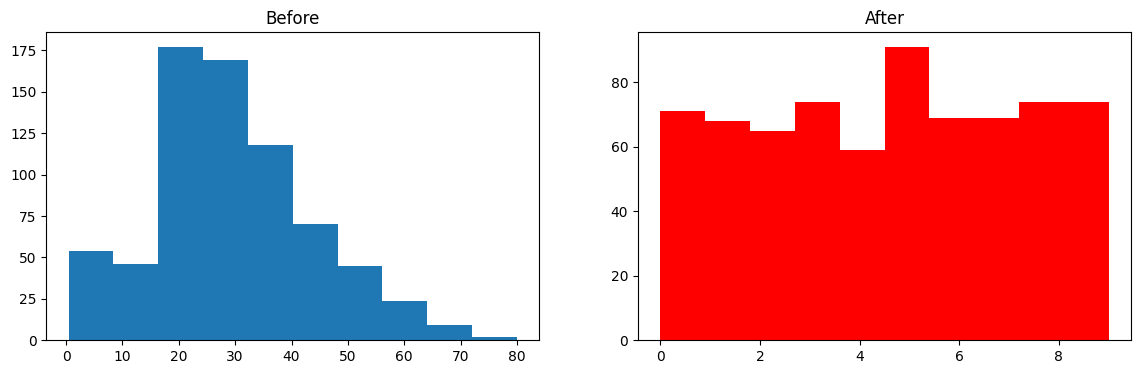

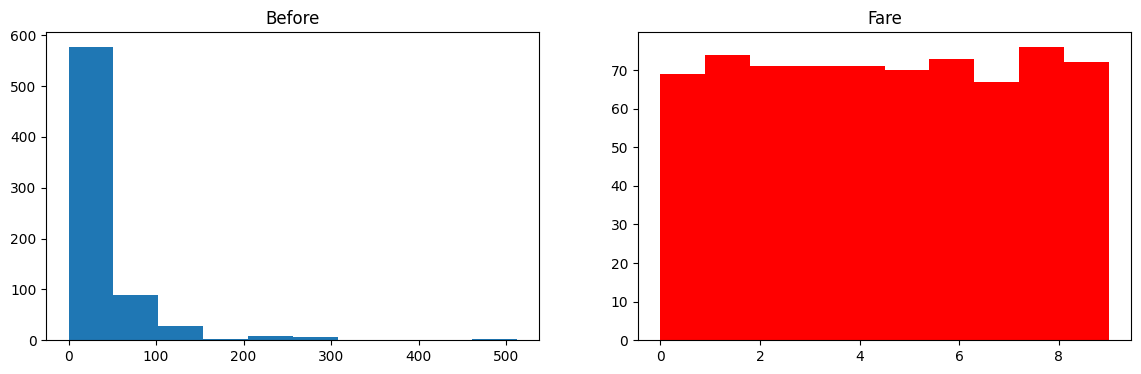

In [107]:
discretize(10,'quantile')

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6330985915492958


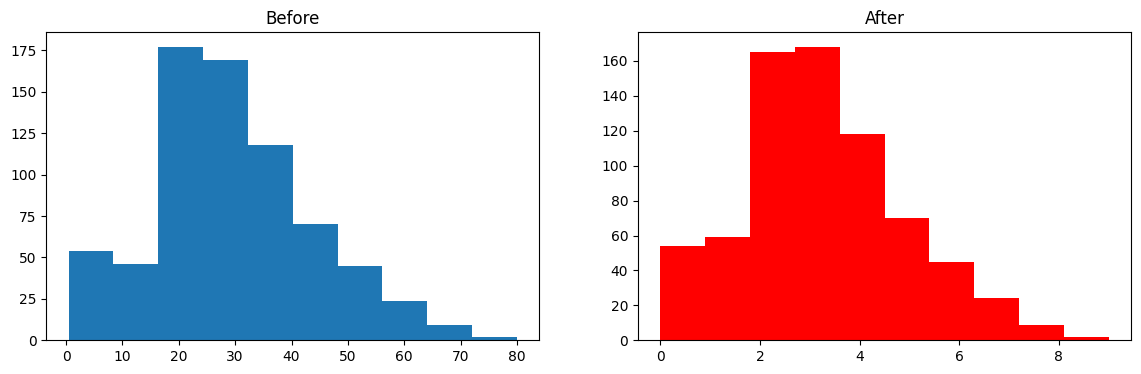

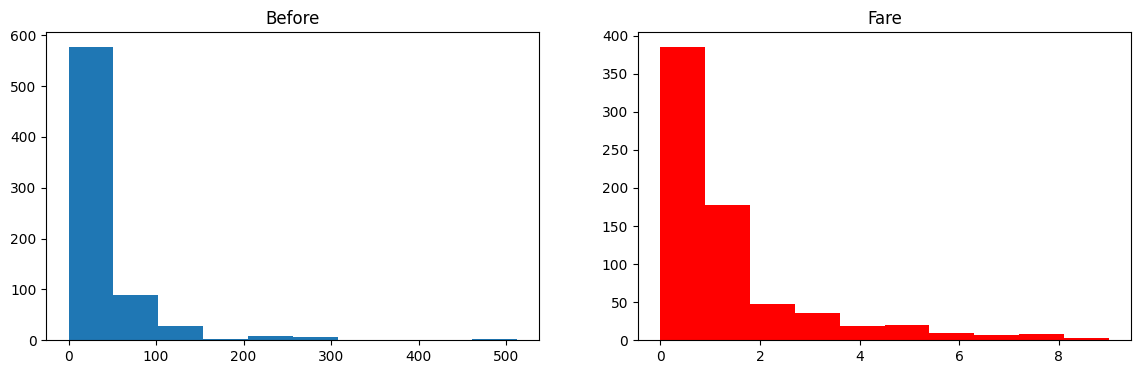

In [109]:
discretize(10,'kmeans')

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6330985915492958


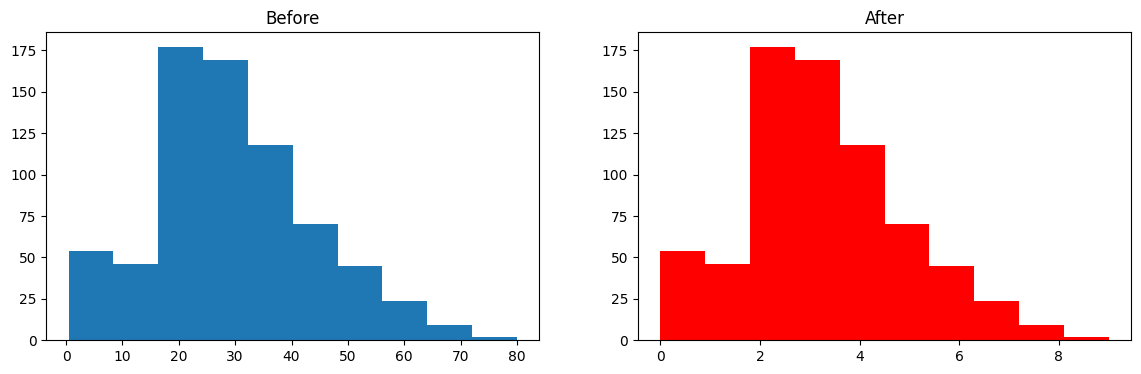

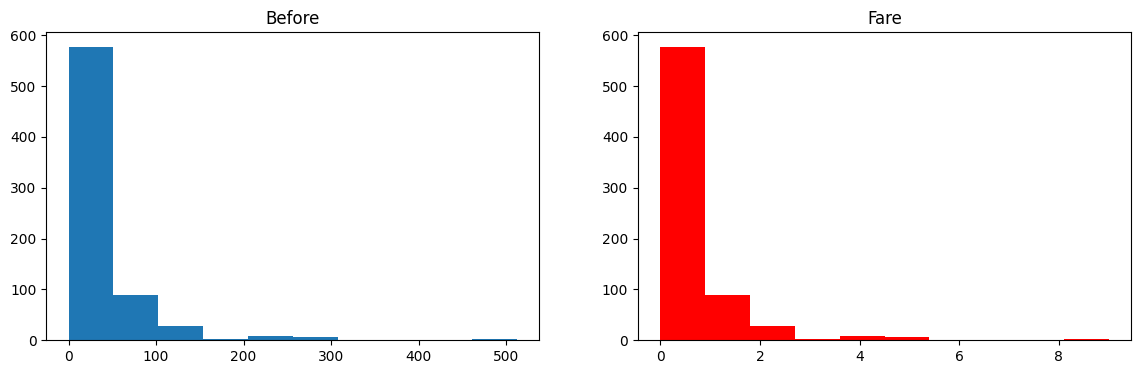

In [110]:
discretize(10,'uniform')